### Gibbs Sampler

### Gibbs Sampler for three-variable Ising Model

### Joint probability $P(x_1,x_2,x_3)$

In [1]:
import numpy as np
def joint_prob(x, theta):
    return np.exp(theta*(x[0]*x[1] + x[1]*x[2] + x[2]*x[0]))

### Conditional probability $P(x_i|x_j,x_k)$

In [2]:
import copy
def compute_conditional_prob(x, n, theta):
    x_cond1 = copy.copy(x)
    x_cond1[n] = -x[n]
    numer = joint_prob(x, theta)
    denom = joint_prob(x, theta) + joint_prob(x_cond1, theta)
    return numer / denom

### Function of Gibbs sampler

In [3]:
import random
def gibbs_sampler(x_bef, n, theta):
    x_aft = copy.copy(x_bef)
    ### Step 1 : ランダム値を適当にサンプル
    random_value = random.uniform(0, 1)
    
    ### Step 2 : 条件付き確率からのサンプル
    sample = compute_conditional_prob(x_bef, n, theta)
    
    ### Step 3 : 状態遷移
    # 本来は条件付き確率からサンプリングした値をそのまま次回の状態として遷移？
    # 今回は離散値をとるものとして処理
    if random_value > sample:
        x_aft[n] = -x_bef[n]
    return x_aft

### Execute

In [4]:
import copy
from itertools import cycle
def execute(theta, state=[1,1,1], repeat=100):
    ret = []
    current = copy.copy(state)
    ret.append(current)
    for i in range(repeat):
        n = i % 3
        current = gibbs_sampler(current, n, theta)
        ret.append(current)
    return ret

# params
theta = 1.0
repeat = 1000

# I.C
state = [-1, -1, 1]

# exe
output = execute(theta, state, repeat)

# labels
labels = [str(ptr) for ptr in output]

### Plot the number of each state

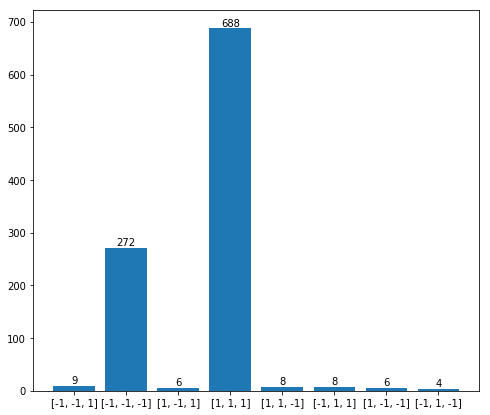

In [5]:
%matplotlib inline
import collections
from matplotlib import pyplot as plt
emg_count = collections.Counter(labels)

plt.figure(figsize=(8,7))
plt.bar(range(len(emg_count)), emg_count.values(), align='center')
plt.xticks(range(len(emg_count)), list(emg_count.keys()))
for i, v in enumerate(emg_count.values()):
    plt.text(i, v, v, ha='center', va='bottom')
plt.show()

### Confirm each state in animation

<IPython.core.display.Javascript object>


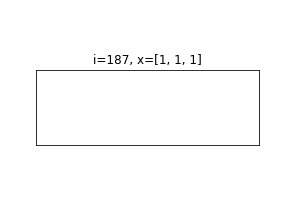

In [7]:
%matplotlib nbagg
import numpy as np
import itertools
from matplotlib import pyplot as plt
from matplotlib import animation

def plot_iterator(i, out, xlabel):
    plt.cla()
    img = np.array(out[i]).reshape((1,3))
    plt.xticks([])
    plt.yticks([])
    plt.title(f"i={i}, x={xlabel[i]}")
    plt.imshow(img, cmap="gray")
    plt.clim(-1, 1)

plt.close()
fig = plt.figure(figsize=(4,3))
ani = animation.FuncAnimation(fig,\
                              plot_iterator,\
                              fargs=(output, labels),\
                              interval=100,\
                              frames=repeat)
plt.show()